In [68]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [69]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics

%matplotlib inline

import mpld3
mpld3.enable_notebook()


def draw_ppls(file_name, start_iter):
    #file_name = 'outputs/loss_10-21-2019-06:07PM'
    with open(file_name) as f:
        all_results = json.load(f)
        # print(result)

    LOG_EVERY = 10
    VALID_ITER = 2000

    print(all_results['args'])
    # The data of 4 epoches
    train_ppls = all_results['train_ppls']
    valid_ppls = all_results['valid_ppls']
    print("Least of dev ppl is:%d" % min(valid_ppls))
    # print(len(train_ppls))
    train_data_iters = np.arange(1, len(train_ppls) + 1) * LOG_EVERY
    valid_data_iters = np.arange(1, len(valid_ppls) + 1) * VALID_ITER

    '''
    The valid data is 200 times of the train data. Maybe we can simplify the train data a bit 
    to see the trend more precisely
    '''
    # Get train ppl medians
    train_ppl_modes = []
    for valid_idx in range(1, len(valid_ppls) + 1):
        train_idx = int(valid_idx * VALID_ITER / LOG_EVERY)
        partial_train_data = train_ppls[(train_idx - 100): (train_idx + 100)]
        train_data_mode_around_idx = statistics.median(partial_train_data)  # Get median
        train_ppl_modes.append(train_data_mode_around_idx)    

    # Cut it by some index, or the too large data would make the graph a mess
    # CUT_ITER = 10000
    train_first_idx = np.where(train_data_iters >= start_iter)[0][0]
    valid_first_idx = np.where(valid_data_iters >= start_iter)[0][0]
    
    draw_valid_ppls = np.array(valid_ppls[valid_first_idx:])
    draw_train_ppls = np.array([train_ppls[train_first_idx:][i*200] for i in range(len(draw_valid_ppls))])
    assert(len(draw_valid_ppls) == len(draw_train_ppls))
    
    average_distance = np.linalg.norm(draw_valid_ppls - draw_train_ppls) / np.sqrt(len(draw_train_ppls))
    print("The average distance from train and valid ppls is: %f" % average_distance)    
    
    plt.title('Train and valid ppls')
    plt.plot(train_data_iters[train_first_idx:], train_ppls[train_first_idx:], '-o', label='train_ppls')
    plt.plot(valid_data_iters[valid_first_idx:], valid_ppls[valid_first_idx:], '-o', label='valid_ppls')
    plt.plot(valid_data_iters[valid_first_idx:], train_ppl_modes[valid_first_idx:], '-o', label='train_medians')
    
    # print(len(valid_ppls))
    plt.xlabel('iterations')
    plt.legend(loc='lower left')
    plt.gcf().set_size_inches(12, 9)
    plt.show()

{'train': True, 'decode': False, 'action': 'train', '--cuda': True, '--train-src': './en_es_data/train.es', '--train-tgt': './en_es_data/train.en', '--dev-src': './en_es_data/dev.es', '--dev-tgt': './en_es_data/dev.en', '--vocab': 'vocab.json', '--seed': 0, '--batch-size': 32, '--embed-size': 256, '--hidden-size': 256, '--clip-grad': 5.0, '--log-every': 10, '--max-epoch': 5, '--input-feed': False, '--patience': 5, '--max-num-trial': 5, '--lr-decay': 0.5, '--beam-size': 5, '--sample-size': 5, '--lr': 0.001, '--uniform-init': 0.1, '--save-to': 'model.bin', '--valid-niter': 2000, '--dropout': 0.3, '--max-decoding-time-step': 70, '--no-char-decoder': False}
Least of dev ppl is:919
The average distance from train and valid ppls is: 504.008159


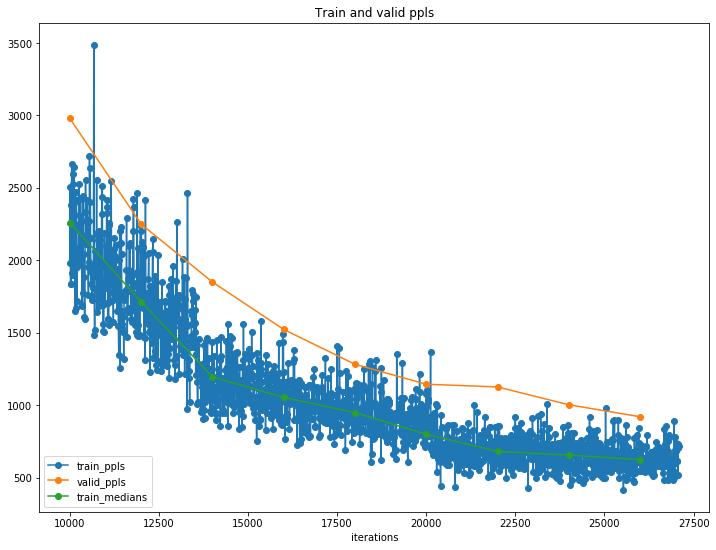

In [70]:
file_name = '../CS224n2019A5_Output/outputs/loss_10-21-2019-06:07PM'
draw_ppls(file_name, 10000)

{'train': True, 'decode': False, 'action': 'train', '--cuda': True, '--train-src': './en_es_data/train.es', '--train-tgt': './en_es_data/train.en', '--dev-src': './en_es_data/dev.es', '--dev-tgt': './en_es_data/dev.en', '--vocab': 'vocab.json', '--seed': 0, '--batch-size': 32, '--embed-size': 256, '--hidden-size': 256, '--clip-grad': 5.0, '--log-every': 10, '--max-epoch': 10, '--input-feed': False, '--patience': 5, '--max-num-trial': 5, '--lr-decay': 0.5, '--beam-size': 5, '--sample-size': 5, '--lr': 0.001, '--uniform-init': 0.1, '--save-to': 'model.bin', '--valid-niter': 2000, '--dropout': 0.3, '--max-decoding-time-step': 70, '--no-char-decoder': False}
Least of dev ppl is:527
The average distance from train and valid ppls is: 368.914015


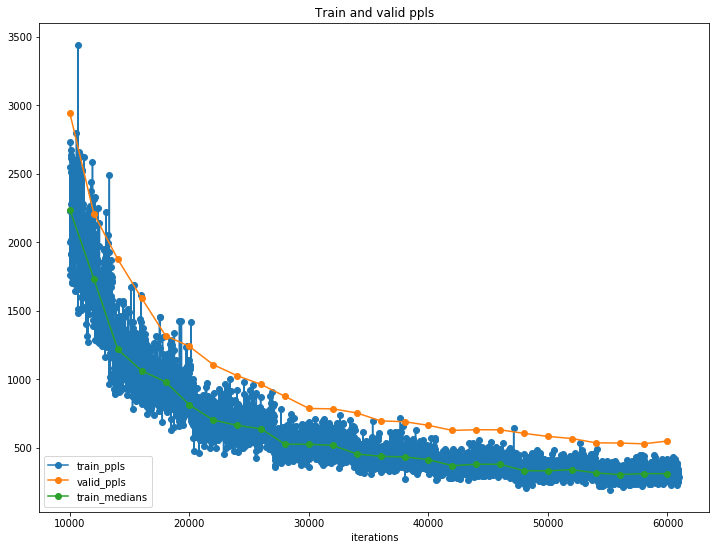

In [71]:
file_name = '../CS224n2019A5_Output/outputs/loss_10-29-2019-11:26AM'
draw_ppls(file_name, 10000)

{'--cuda': True, '--train-src': '/content/en_es_data/train.es', '--train-tgt': '/content/en_es_data/train.en', '--dev-src': '/content/en_es_data/dev.es', '--dev-tgt': '/content/en_es_data/dev.en', '--vocab': '/content/en_es_data/vocab.json', '--seed': 0, '--batch-size': 32, '--embed-size': 256, '--hidden-size': 256, '--clip-grad': 5.0, '--log-every': 10, '--max-epoch': 20, '--input-feed': True, '--patience': 5, '--max-num-trial': 5, '--lr-decay': 0.5, '--beam-size': 5, '--sample-size': 5, '--lr': 0.001, '--uniform-init': 0.1, '--save-to': 'model.bin', '--valid-niter': 2000, '--dropout': 0.5, '--max-decoding-time-step': 70, '--no-char-decoder': False, 'train': True}
Least of dev ppl is:514
The average distance from train and valid ppls is: 252.763424


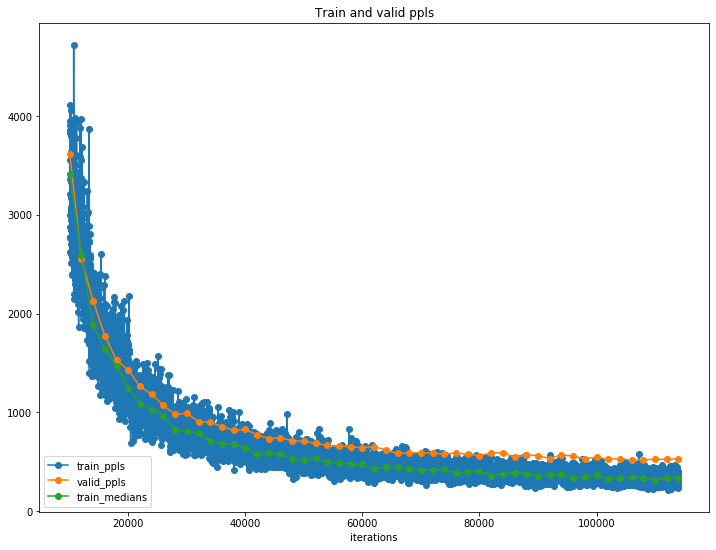

In [72]:
file_name = '../CS224n2019A5_Output/outputs/loss_11-01-2019-12_51AM'
draw_ppls(file_name, 10000)

{'train': True, '--train-src': '/content/CS224n2019A5/en_es_data/train.es', '--train-tgt': '/content/CS224n2019A5/en_es_data/train.en', '--dev-src': '/content/CS224n2019A5/en_es_data/dev.es', '--dev-tgt': '/content/CS224n2019A5/en_es_data/dev.en', '--vocab': '/content/CS224n2019A5/vocab.json', '--cuda': True, '--valid-niter': '2000', '--lr': '0.001', '--seed': '0', '--max-num-trial': '5', '--help': False, '--beam-size': '5', '--clip-grad': '5.0', '--patience': '5', '--max-decoding-time-step': '70', '--batch-size': '32', '--embed-size': '256', '--save-to': 'model.bin', '--sample-size': '5', '--lr-decay': '0.5', '--uniform-init': '0.1', '--is-google-colab': True, '--log-every': '10', '--ppl-save-dir': '/content/drive/My Drive/result_11-04-2019-10-45AM', '--max-epoch': '20', '--hidden-size': '256', '--input-feed': False, '--dropout': '0.4', '--no-char-decoder': False, 'decode': False, 'MODEL_PATH': None, 'TEST_SOURCE_FILE': None, 'OUTPUT_FILE': None, 'TEST_TARGET_FILE': None}
Least of dev

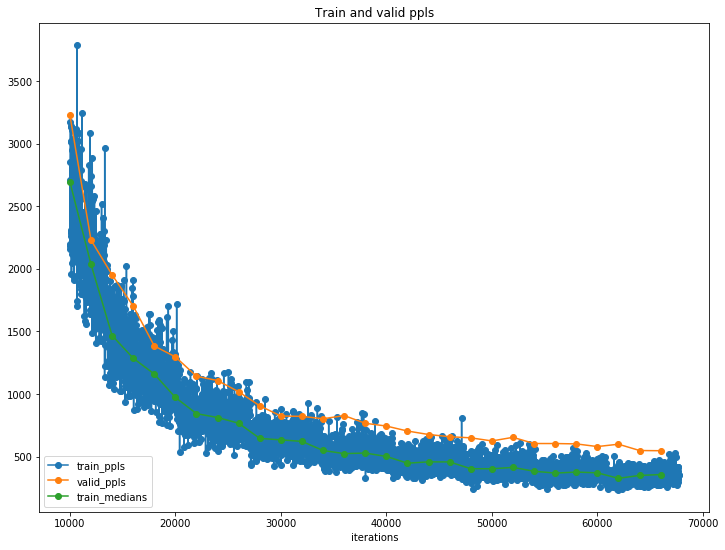

In [73]:
file_name = '../CS224n2019A5_Output/outputs/ppl.json'
draw_ppls(file_name, 10000)